# **Unsupervised Learning Techniques**

Clustering: Group similar instances together into clusters. Great tool for data nalysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, etc.

Anomaly detection(Outlier): the objective is to learn what does normal data look like and then use that to detect abnormal instances. Used for fraud detection, detecing defective products, identifying new trends in time series or removing outliers.

Density estimation: task of estimating the probability density function(PDF) of the random process that generated the dataset. commonly used for anomaly detection: instances in low-density regions are likely to be anomalies

## **Clustering**
It is the task of identifying similar instances and clustering them in groups.

There is no universal definition of what is a cluster it depends on the dataset and the context. Some may look for instances lying close to centroids while others may search for densely packed instaces or look for heirarchies.

### **k-means**

A simple algorithm capable of clustering dataset very quickly and efficiently in few iterations

In [57]:
import os
os.environ["OMP_NUM_THREADS"] = "4" 

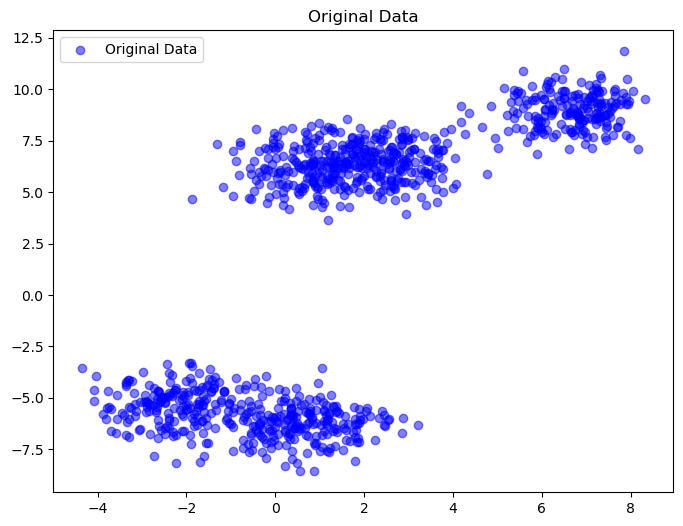

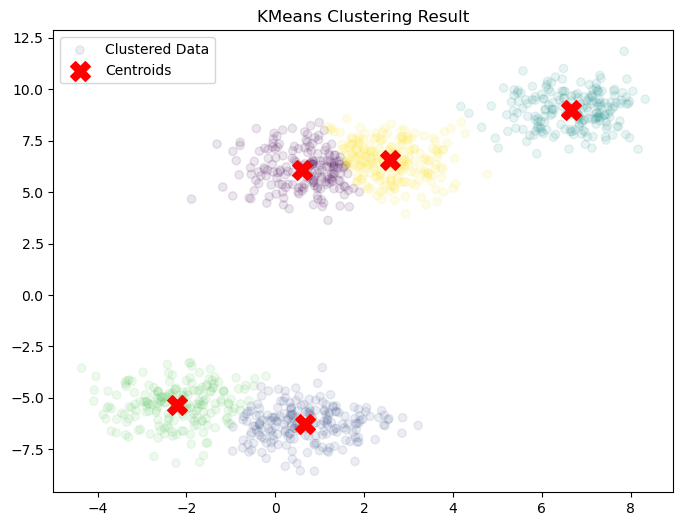

In [58]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples=1000,centers=5,n_features=2,cluster_std=0.9)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.5, label='Original Data',)
plt.title("Original Data")
plt.legend()
plt.show()
k = 5
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
# Visualize the KMeans clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', label='Clustered Data',alpha=0.1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering Result")
plt.legend()
plt.show()

we need to specify number of clusters k, that the algorithm must find. In context of clustering an instance's label is the index of the cluster to hich the algorithm assigns this instace.

In [59]:
print(y_pred)

[1 3 0 1 4 2 1 3 1 2 3 1 3 3 1 3 1 3 2 0 4 4 0 4 2 3 0 3 4 2 4 2 3 1 1 3 4
 0 2 2 4 0 1 0 4 3 3 3 1 1 1 2 0 1 0 0 3 4 1 1 1 2 2 3 3 0 0 0 1 1 0 4 3 2
 4 4 4 3 2 0 3 4 4 1 3 3 0 3 3 3 2 1 3 2 3 1 2 4 3 2 0 0 1 1 1 1 2 2 4 4 3
 1 2 0 3 0 3 0 2 2 2 0 1 0 2 2 4 1 2 0 1 4 0 1 1 0 4 3 4 0 1 4 0 2 3 1 3 3
 3 4 1 3 1 3 2 0 0 0 4 0 1 0 0 4 3 2 4 0 2 2 2 3 0 4 0 4 1 0 1 3 1 1 1 3 4
 2 3 2 4 2 2 0 2 4 4 0 0 4 4 4 1 3 4 4 0 3 2 2 4 4 4 2 3 0 1 1 3 0 0 4 4 3
 2 2 1 1 4 4 1 4 1 1 3 3 4 1 2 2 2 4 0 0 3 4 2 0 1 1 4 2 4 2 4 0 4 2 0 0 1
 3 4 1 2 4 4 2 1 4 2 2 4 1 0 1 3 2 3 4 3 4 0 1 2 1 2 4 4 4 1 0 3 0 0 4 1 0
 1 3 2 1 0 2 3 3 3 3 4 4 3 3 0 4 4 3 1 4 0 0 0 0 2 2 4 4 3 0 3 2 4 4 4 1 3
 3 1 4 1 0 0 0 0 4 0 2 0 0 2 3 2 2 0 0 3 3 2 2 0 2 2 0 1 4 4 3 2 3 0 1 0 2
 2 2 4 4 0 0 3 4 0 4 4 0 2 3 2 1 3 3 4 4 1 1 2 4 1 2 1 2 0 0 2 3 3 0 4 3 2
 2 2 4 2 3 4 0 3 1 4 1 0 3 1 4 3 4 3 0 4 0 4 0 2 1 0 2 2 4 4 4 4 3 4 2 2 3
 2 4 1 1 4 0 2 1 3 4 1 2 2 4 0 1 0 3 1 3 0 1 4 1 2 4 4 0 4 2 2 3 4 3 2 4 4
 4 2 2 1 3 0 4 2 1 2 0 4 

In [60]:
print(kmeans.cluster_centers_)

[[ 0.61029086  6.09593777]
 [ 0.67519262 -6.27412332]
 [ 6.65912439  8.97907079]
 [-2.20522672 -5.32642584]
 [ 2.58843172  6.55799309]]


In [61]:
import numpy as np
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
print(kmeans.predict(X_new))

[0 4 0 0]


The above is hard clustering i.e an instance is assgine to a cluster, we could also use soft clustering which instead returns a score for instance per cluster

In [62]:
print(kmeans.transform(X_new).round(2))

[[ 4.14  8.3   9.65  7.65  5.24]
 [ 4.74  8.59  7.88  8.99  4.58]
 [ 4.76  9.98 11.36  8.36  6.62]
 [ 5.1   9.51 11.63  7.87  6.91]]


**k-means algorithm**

It works by iteratively assigning each data point to the nearest cluster center (centroid) and then recalculating the centroids as the mean of the points assigned to each cluster. The algorithm follows these steps:

1) Initialization: Choose k initial centroids, typically randomly from the data points.

2) Assignment: Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance).

3) Update: After all points are assigned to clusters, update each centroid by calculating the mean of the data points in that cluster.

4) Repeat: Repeat the assignment and update steps until convergence, meaning that the centroids no longer change or the maximum number of iterations is reached.

This process aims to minimize the sum of squared distances between each point and its assigned centroid, achieving a set of centroids that best represent the structure of the data.

Although, the algorithm is garaunteed to converge; it may not converge to the global optima as it is dependent upon centroid initialization

**Centroid initialization methods**

if you happen to know approximately wher the centroids should be we can pass it to the hyperparameter init and set n_init = 1

In [63]:
#good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
#kmeans = KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
#kmeans.fit(X)

Another solution is to run the model multiple times and keep the best model, how many times it should run is decided by n_init which is 10 by default.

What is the performance metric?

*inertia*, the sum of the squared distances between the instances and their closest centroids

In [64]:
print(kmeans.inertia_)

1412.6360028045037


In [65]:
print(kmeans.score(X))

-1412.6360028045037


score returns the -ve inertia which is easier to understand, the bigger the score better our model

scikit-learn uses kmeans++ intialization method by default which is proven to be better than the kmeans initialization

**Accelerated k-means and mini batch k-means**

Accelerated k-means: proposed by Elkan it is supposed to be faster for large datasets by avoiding unncessary distance calculations, but it is not always the faster one. set algorithm="elkan" to try it

Mini-Batch k-means: Instead of using full dataset at each iteration use a small batch and use that to move centroids slightly at each. This speeds up the algo and makes it possible to fit huge datasets.

In [66]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5,random_state=42)
minibatch_kmeans.fit(X)
print(minibatch_kmeans.score(X))

-1430.1402101651283


although mini-batch k-means is fast it has a higher inertia compared to k-means especially as number of clusters increase, but works good if you want lower training time

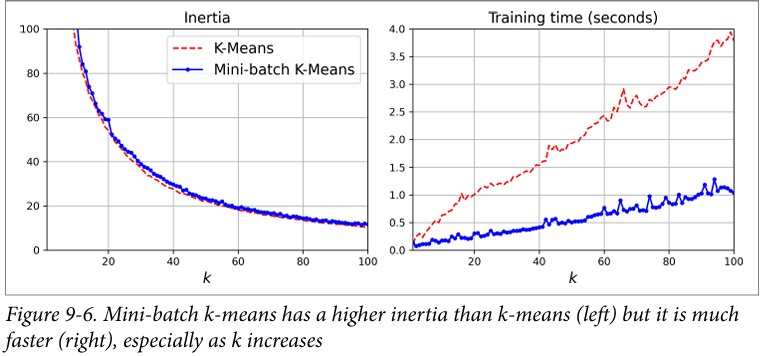

**Finding the optimal number of clusters**

Using inertia is not a good measure to select number of clusters as it will keep on decreasing as we increase number of clusters as the distance between the instance and centroids will keep on decreasing.

Elbow method: plotting the inertia for different number of clusters. The method is coarse


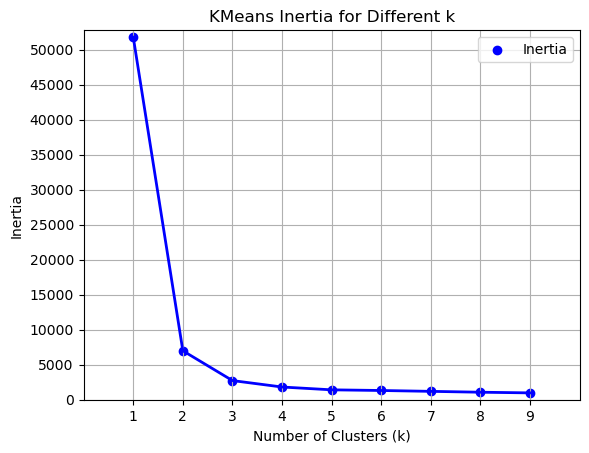

In [68]:
os.environ["OMP_NUM_THREADS"] = "4"
inertia = []
clusters = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters.append(k)
    inertia.append(kmeans.inertia_)

plt.scatter(clusters, inertia, label="Inertia", color='blue')
plt.plot(clusters, inertia, color='blue', linestyle='-', linewidth=2)  # Line connecting the points
plt.xlim(0, 10)
plt.ylim(0, max(inertia) + 1000)
plt.xticks(range(1, 10))  # Set x-ticks from 1 to 9 (for k clusters)
plt.yticks(range(0, int(max(inertia)) + 1000, 5000))  # Set y-ticks with a step of 100
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('KMeans Inertia for Different k')
plt.grid()
plt.legend()
plt.show()

Another method is to use the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coeffecient is equal to (b-a)/max(b,a) where a is the mean distance to all points in the same cluster(i.e. mean intra cluster distance) and b is the mean nearest-cluster deistance. 

The silhouette coefficient varies between 1 and -1, with 1 being instance is within it's cluster and far from other clusters while -1 means the instance might have been assigned to wrong cluster, similar to the elbow method we make a silhoutte score vs number of clusters plot

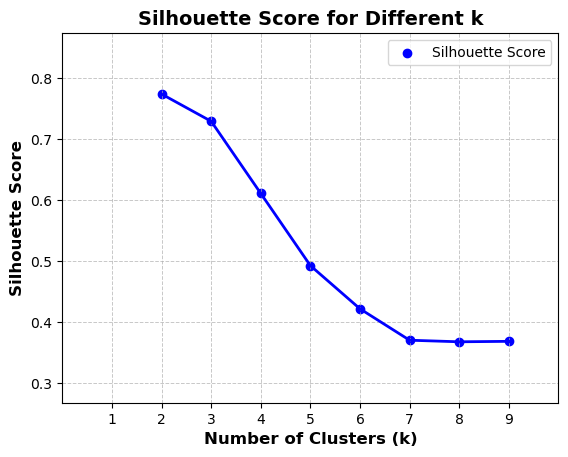

In [74]:
from sklearn.metrics import silhouette_score
score = []
clusters = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters.append(k)
    ss = silhouette_score(X, kmeans.labels_)  # Calculate silhouette score
    score.append(ss)

# Scatter plot with a line connecting the points
plt.scatter(clusters, score, label="Silhouette Score", color='blue')
plt.plot(clusters, score, color='blue', linestyle='-', linewidth=2)  # Line connecting the points

# Set limits for x and y axes
plt.xlim(0, 10)
plt.ylim(min(score)-0.1, max(score) + 0.1)  # Use max(score) instead of max(inertia)

# Set x and y ticks
plt.xticks(range(1, 10))  # Set x-ticks from 1 to 9 (for k clusters)

# Add labels, title, and grid
plt.xlabel('Number of Clusters (k)', fontsize=12, weight='bold')
plt.ylabel('Silhouette Score', fontsize=12, weight='bold')
plt.title('Silhouette Score for Different k', fontsize=14, weight='bold')

# Add grid and legend
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

# Display the plot
plt.show()

### **Limits of kmeans**
- Needs to be run multiple times to avoid suboptimal solution
- Number of clusters need to be difined
- Doesn't work well if the clusters are of varying size,densities or nonspherical shape

### **Using Clustering for Image Segmentation**
Image segmentation is the task of partitioning into multiple segements.
- Color segmentation, pixels of same color get assigned to same segment
- Semantic segmentation, pixels that are part of the  same object type get assigned to the same segment
- Instance segment, all pixels that are part of the same individual object are assigned to the same segment



## **DBSCAN**
Density-based spatial clustering of application with noise, definess clusters of high region density. Here's how it works:
- For each instance it counts no. of instances inside it's epsilon distance, this region is called epsilon-neighborhood
- if the an instance has more than min_samples in its epsilon-neighborhood, it is a core point i.e. located in a dense region
- all instances in the neighborhood of core point belong to same cluster and might include multiple core points
- any instance that is not a core instance or doesn't have one in its negihborhood is considered anomaly

In [107]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.05)
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [108]:
dbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

-1 means they are anomalies

In [109]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [110]:
dbscan.components_

array([[ 0.80833737, -0.49891652],
       [ 1.0311686 ,  0.23462473],
       [ 1.00750867, -0.48030464],
       ...,
       [-0.95205191,  0.14094959],
       [ 1.92183048,  0.32599097],
       [-0.20429159,  0.9774471 ]])

In [111]:
print(len(dbscan.components_)," ",len(dbscan.core_sample_indices_))

1000   1000


core_sample_indices_: The indices of the core samples (points that meet the density criteria).

components_: The actual data points corresponding to the core samples.

dbscan doesn't have predict method although it has a fit_predict() method. It cannot predict what cluster a new instance belongs to.

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [113]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[1 0 1 0]
[[0.16 0.84]
 [1.   0.  ]
 [0.22 0.78]
 [1.   0.  ]]


DBSCAN for anomaly detection

- Suppose we have a DBSCAN model that has already clustered the data into a set of core samples (label 0, 1, etc.) and noise (label -1).
- We use a KNeighborsClassifier trained on the core samples to classify new points (X_new).
- The kneighbors() method finds the nearest neighbor(s) for each new point.
- The classifier then retrieves the DBSCAN cluster label of the nearest core sample.
- If a point is far from any core sample (e.g., the distance is greater than a certain threshold, like 0.2), it is classified as an anomaly (-1).
- If the point is close to a core sample, it is assigned the same label as that cluster.

In [120]:
y_dist,y_pred_idx = knn.kneighbors(X_new,n_neighbors=1)
print(y_dist,"\n",y_pred_idx)

[[0.39400765]
 [0.03561034]
 [0.11595582]
 [0.435757  ]] 
 [[273]
 [699]
 [743]
 [861]]


In [121]:
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
print(y_pred)

[[1]
 [0]
 [1]
 [0]]


In [122]:
y_pred[y_dist>0.2]=-1

In [123]:
print(y_pred)

[[-1]
 [ 0]
 [ 1]
 [-1]]


DBSCAN is a simple but powerful algorithm capable of finding any numbers of clusters of different shape. It can struggle to capture clusters if the density doesn't vary. It doesn't scale well to large datsets

## More Clustering Algorithms

### 1. Agglomerative Clustering
- Approach: Builds a hierarchy of clusters bottom-up by iteratively merging the closest pair of clusters.
- Key Feature: Produces a dendrogram (tree) to visualize the cluster structure, providing flexibility in choosing the number of clusters.
- Scalability: Works well for small to medium datasets. Can scale for large datasets if a connectivity matrix is provided, indicating which instances are neighbors.
- Use Cases: Suitable for capturing clusters of various shapes. Useful for hierarchical clustering and when the number of clusters isn't predefined.

### 2. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
- Approach: Designed for large datasets, BIRCH builds a tree structure that summarizes the data and assigns each new instance to a cluster efficiently.
- Key Feature: Memory efficient and can handle large datasets due to its tree-based structure.
- Limitation: Works best when the number of features is small (<20).
- Use Cases: Ideal for large-scale clustering tasks where memory usage is a concern.

### 3. Mean-Shift
- Approach: Iteratively shifts a circle (kernel) around each instance towards the mean of nearby points, stopping when the shift converges.
- Key Feature: Identifies clusters based on local density without needing to predefine the number of clusters.
- Limitation: Computational complexity of O(m²n), which makes it unsuitable for large datasets.
- Use Cases: Suitable for non-linear clusters and high-density areas. Can handle clusters of arbitrary shape but struggles with density variations within clusters.

### 4. Affinity Propagation
- Approach: Instances exchange messages to elect "exemplars" (central points) that represent clusters. Clusters are formed around these exemplars.
- Key Feature: Does not require specifying the number of clusters beforehand; it is determined during training.
- Limitation: Computational complexity of O(m²) makes it inefficient for large datasets.
- Use Cases: Effective for clustering when the number of clusters is unknown and when clusters have different sizes.

### 5. Spectral Clustering
- Approach: Uses a similarity matrix to create a low-dimensional embedding of the data, then applies another clustering algorithm (e.g., K-means) in the low-dimensional space.
- Key Feature: Can capture complex cluster structures, such as those in graph partitioning or networks (e.g., social networks).
- Limitation: Scalability issues with large datasets and poor performance when clusters have very different sizes.
- Use Cases: Ideal for clustering based on graph-based data or complex, non-convex structures.

### Key Takeaways:
- Scalability: Algorithms like BIRCH and Agglomerative clustering (with a connectivity matrix) scale better to large datasets.
- Flexibility: Mean-shift and Affinity Propagation can detect clusters of arbitrary shapes without requiring the number of clusters to be predefined.
- Complexity: Algorithms like Spectral Clustering and Affinity Propagation are computationally expensive for large datasets but offer more flexibility in clustering complex data structures.

### Use Cases Overview:
- Large Datasets: BIRCH is ideal for large datasets, and Agglomerative clustering can scale with a connectivity matrix.
- Arbitrary Cluster Shapes: Mean-shift and spectral clustering excel in identifying clusters of arbitrary shapes.
- Unknown Cluster Count: Affinity propagation and spectral clustering do not require the number of clusters to be predefined.


## **Gaussian Mixtures**
GMM is a probabilistic model that believes that the dataset was generated from a mixture of several gaussian distributions whose paraemeters are unknown.

All the instances formed from a Gaussian mixture form an ellipsoid like cluster, each cluster can have different shape,size,density and orientation. 

The simplest variant of GMM is the GaussianMixture class in which, you must know in advance the number k of Gaussian distributions. 

In [124]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

the parameters are:

In [125]:
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)

[0.59604021 0.2033041  0.20065568]
[[ 0.50186166  0.24624674]
 [-0.7425236   0.5544683 ]
 [ 1.74920912 -0.05269929]]
[[[ 0.17253258 -0.10416985]
  [-0.10416985  0.28802161]]

 [[ 0.05212432  0.06140542]
  [ 0.06140542  0.08603567]]

 [[ 0.04948379  0.05877212]
  [ 0.05877212  0.08524392]]]


similar to k means GMM can converge to a suboptimal solution so it is should be run multiple times, n_init = 1 by default


In [126]:
print(gm.converged_)
print(gm.n_iter_)

True
18


the GMM converged after 18 iterations

use the predict() method for hard clustering or predict_proba() to get soft clustering votes

GMM is a generative model, i.e. you can sample new instances from it (note they are ordered by cluster index)

In [127]:
X_new,y_new = gm.sample(6)
print(X_new)
print(y_new)

[[ 0.0287192  -0.18593842]
 [ 0.97647814 -0.23236156]
 [ 0.58897275 -0.74255304]
 [-0.70179315  0.61215618]
 [-0.67650918  0.56490905]
 [ 1.9753562   0.12052035]]
[0 0 0 1 1 2]


In [128]:
gm.score_samples(X_new).round(2)

array([-2.52, -1.47, -2.7 ,  0.18, -0.01, -0.67])

the attribute score_samples give the value of PDF at the location of the given instance, it is used for anomaly detection, by defining a threshold we can find instance with low-density and is an anomaly.

In [129]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,2)
anomalies = X[densities<density_threshold]
print(anomalies)

[[ 1.98097899  0.50508707]
 [-0.20699361  0.95026181]
 [ 1.83992658 -0.24221786]
 [ 1.046967   -0.63238853]
 [-0.88334209  0.09105421]
 [ 1.90912301  0.46176426]
 [-0.94960268 -0.1279256 ]
 [ 1.26204695 -0.39552997]
 [-0.2795488   0.78652181]
 [-0.89783398  0.07522023]
 [ 1.233218   -0.36567806]
 [-0.99462354  0.01976743]
 [ 2.02541584  0.54981218]
 [ 1.99554792  0.54240851]
 [ 1.23455791 -0.38686744]
 [ 1.28189133 -0.3756271 ]
 [ 2.00244422  0.56424985]
 [ 1.93932666  0.49182171]
 [ 1.94712155  0.46674573]
 [-0.9235268   0.07965763]]


GMM is not easy to use in real life situation as it is dependent on the EM. EM can struggle to converge to optimal solution in case of many dimensions, clusters or few instances. To reduce the difficulty reduce the number of parameters that the algorithm has to learn. One method is to limit range, shape and orientation that cluster can have. we can set the hyperparameter *covariance_type*:

1) "spherical" : All clusters must be spherical

2) "diag" : clusters can take on any ellipsoid shape but the axes must be parallel to coordinate axes

3) "tied" : all clusters must have same ellipsoidal shape,size and orientation

by default it is "full", each cluster can take any shape, sie and orientation.

**Selecting the Number of Clusters**

We cannot use inertia or silhouette score as the clusters are of irregular shape and sizes.

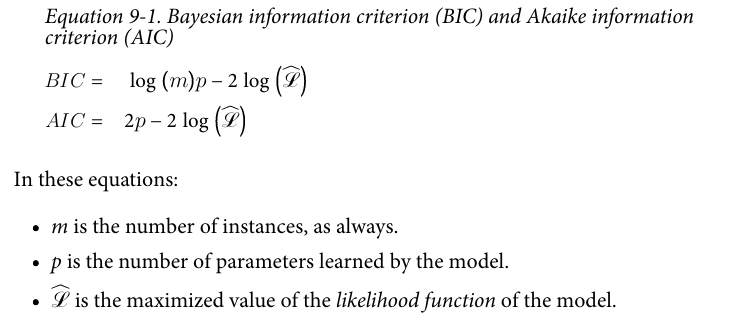

Both BIC and AIC penalize models that have more parameters to learn (ex: more clusters) and rewards the model that fit well. Both usually select model, if they differ BIC tends to be simpler than AIC but doesn't fit that well

In [130]:
print(gm.bic(X))
print(gm.aic(X))

2725.764372035464
2642.3325322927676


**Bayesian Gaussian Mixture Models**

Rather than manually searching for optimal number of clusters we can use the class BayesianGaussianMixture, just intitialize it with more clusters than the optimal number of clusters(some knowledge is required). It will eliminate the unnecessary clusters by itself.

In [132]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10,n_init=100,random_state=42)
bgm.fit(X)
print(bgm.weights_.round(2))

[0.1  0.13 0.15 0.2  0.16 0.   0.15 0.   0.   0.11]


>A final note on gaussian mixture models: although they perform well on ellipsoid shaped data they won't perform so well with clusters of very different shapes

some more anomaly and novelty detection in scikit-learn:

1. **Fast-MCD (Minimum Covariance Determinant)**: The EllipticEnvelope class detects outliers by assuming normal instances follow a Gaussian distribution, with outliers not following this pattern. It estimates the distribution while ignoring outliers to improve detection accuracy.

2. **Isolation Forest**: This algorithm detects anomalies by isolating instances using randomly built decision trees. Anomalies are isolated faster than normal instances, making this method efficient, especially for high-dimensional data.

3. **Local Outlier Factor (LOF)**: LOF detects outliers by comparing the density around a point to its neighbors. Anomalies typically have lower density compared to their neighbors.

4. **One-Class SVM**: This novelty detection method uses a kernelized SVM to map instances to a high-dimensional space and identifies anomalies by separating instances from the origin. It's effective for high-dimensional datasets but not ideal for large datasets.

5. **PCA and Dimensionality Reduction**: By comparing reconstruction errors between normal and anomalous instances, anomalies tend to have higher reconstruction errors, making this a simple and efficient detection method.

## **Exercise**

1) How would you define clustering? Can you name a few clustering algorithms?

    Clustering is an algorithm where we cluster similar instances together based on a similarity measure dependent upon the context. ex: k-means, dbscan

2) What are some of the main applications of clustering algorithms?

    The main applications of clustering algorithms include data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, anomaly detection, and novelty detection.

3) Describe two techniques to select the right number of clusters when using k-means.
 
    Elbow method which plots inertia vs clusters and silhouete score where we plot the silhouette score vs clusters

4) What is label propagation? Why would you implement it, and how?

    Label propagation is an application where we cluster similar instances together and give them a label. It can be considered as a semi-supervised learning algorithm, we cluster instances together and based upon the majority label of the ones available we label all the instances

5) Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

    K-Means and BIRCH scale well to large datasets. DBSCAN and Mean-Shift look for regions of high density.
 
6) Can you think of a use case where active learning would be useful? How would you implement it?

    Label propagation, cluster similar images together and ask a human expert to label a certain percentage and propagate labels to other instances
 
7) What is the difference between anomaly detection and novelty detection?

    Many people use the terms anomaly detection and novelty detection interchangeably, but they are not exactly the same. In anomaly detection, the algorithm is trained on a dataset that may contain outliers, and the goal is typically to identify these outliers (within the training set), as well as outliers among new instances. In novelty detection, the algorithm is trained on a dataset that is presumed to be "clean," and the objective is to detect novelties strictly among new instances. Some algorithms work best for anomaly detection (e.g., Isolation Forest), while others are better suited for novelty detection (e.g., one-class SVM).

8) What is a Gaussian mixture? What tasks can you use it for?

    Dataset formed by Gaussian distributions. It is useful for datasets where the clusters are ellipsoid shaped.This model is useful for density estimation, clustering, and anomaly detection.


9) Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

    AIC and BIC are the technique used to find the right number of clusters when using a GMM
 
10) The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. Forty different people were photographed (10 times each), and the usual task is to train a model thatcan predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

11) Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next,
 use k-means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get
 the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the
 best number of clusters)?

12) Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

13) Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise and look at their reconstruction error: notice how much larger it is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.